In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Análisis descriptivo de los datos

In [188]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reto mercadotecnia/bank_marketing_RETO_DS_AS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [189]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [190]:
data.nunique()

,0
age,74
job,12
marital,3
education,4
default,2
balance,3476
housing,2
loan,2
contact,3
day,31


In [191]:
data['y'].value_counts()

,count
y,
no,5213
yes,3787


In [192]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


# Transformando variables categóricas a numéricas

In [193]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [194]:
# Desechar columna "day" y transformando "month" con LabelEncoding
data['quarter'] = pd.to_datetime(data['month'], format= '%b', errors='coerce').dt.quarter
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,quarter
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes,4
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes,3
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no,4
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no,3
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes,3


In [195]:
data = data.drop(columns=['month','day'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   duration   9000 non-null   int64 
 10  campaign   9000 non-null   int64 
 11  pdays      9000 non-null   int64 
 12  previous   9000 non-null   int64 
 13  poutcome   9000 non-null   object
 14  y          9000 non-null   object
 15  quarter    9000 non-null   int32 
dtypes: int32(1), int64(6), object(9)
memory usage: 1.1+ MB


In [196]:
# Conocer las categorías posibles y aplicar dicho orden para variable "education"
data['education'].value_counts()
sort = {'unknown':0,'primary':1,'secondary':2,'tertiary':3}
data['education'] = data['education'].map(sort)

In [197]:
# OneHotEncoding para las variables y eliminando columnas innescesarias para
# variables binarias
col_OH = ['job','marital','education','default','housing','loan','contact','poutcome','y']
data = pd.get_dummies(data, columns=col_OH, dtype= np.int64, drop_first=True)
data.head()

,age,balance,duration,campaign,pdays,previous,quarter,job_blue-collar,job_entrepreneur,job_housemaid,...,education_3,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,31,2666,318,2,97,6,4,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,29,1584,245,1,-1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,41,2152,369,1,-1,0,4,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,50,84,18,8,-1,0,3,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,40,0,496,2,182,11,3,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# Transformando variables numéricas para contrarestar sesgo

(array([6.941e+03, 6.880e+02, 6.560e+02, 3.210e+02, 3.090e+02, 5.200e+01,
        1.700e+01, 4.000e+00, 6.000e+00, 6.000e+00]),
 array([ -1. ,  84.1, 169.2, 254.3, 339.4, 424.5, 509.6, 594.7, 679.8,
        764.9, 850. ]),
 <BarContainer object of 10 artists>)

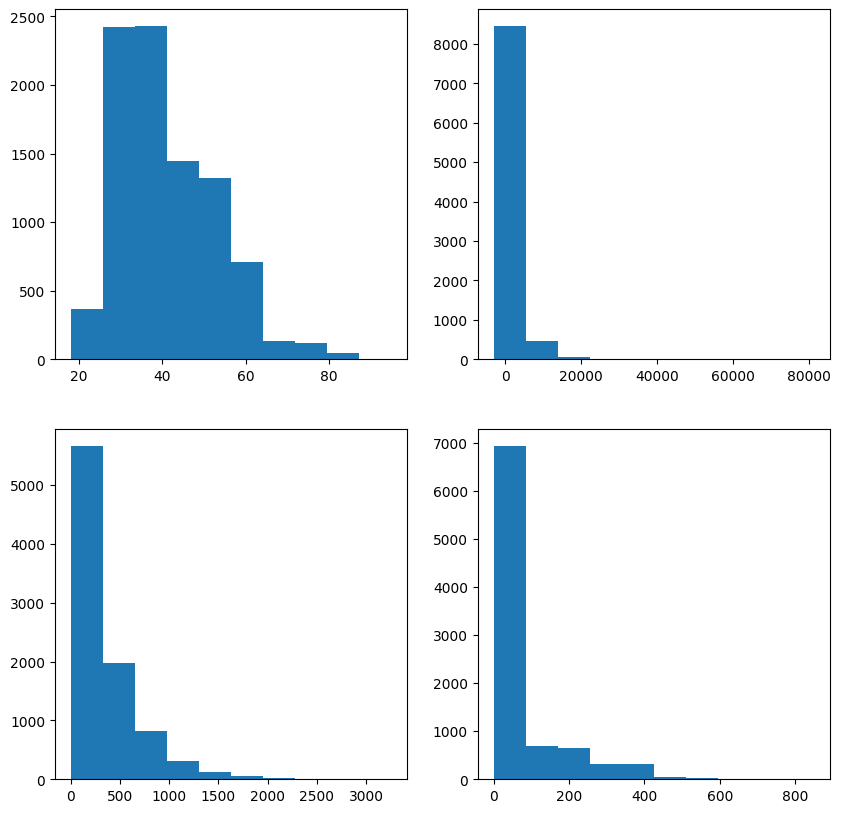

In [198]:
# Primero observar la distribución de las variables numéricas
fig, axes = plt.subplots(2,2,figsize= (10,10))
axes[0,0].hist(data['age'])
axes[0,1].hist(data['balance'])
axes[1,0].hist(data['duration'])
axes[1,1].hist(data['pdays'])

In [226]:
# Como se ve un sesgo positivo procederemos a aplicarle una transformación logarítmica
# Para edad
def t_log_age (x):
  return np.log(x)

# Para duration
def t_log_dur (x):
  return np.log(x + 1)

# Para balance
def t_log_balance (x):
  x = x -x.min() + 1
  return np.log(x)


In [227]:
# Para pdays primero recorreremos en 1 para no tener datos negativos
data['pdays'] = data['pdays'] + 1

# Podemos aplicarle la misma transformación que a duration

(array([6781.,    7.,   13.,   13.,   12.,   34.,  541.,  805.,  716.,
          78.]),
 array([0.        , 0.67475865, 1.34951731, 2.02427596, 2.69903461,
        3.37379326, 4.04855192, 4.72331057, 5.39806922, 6.07282787,
        6.74758653]),
 <BarContainer object of 10 artists>)

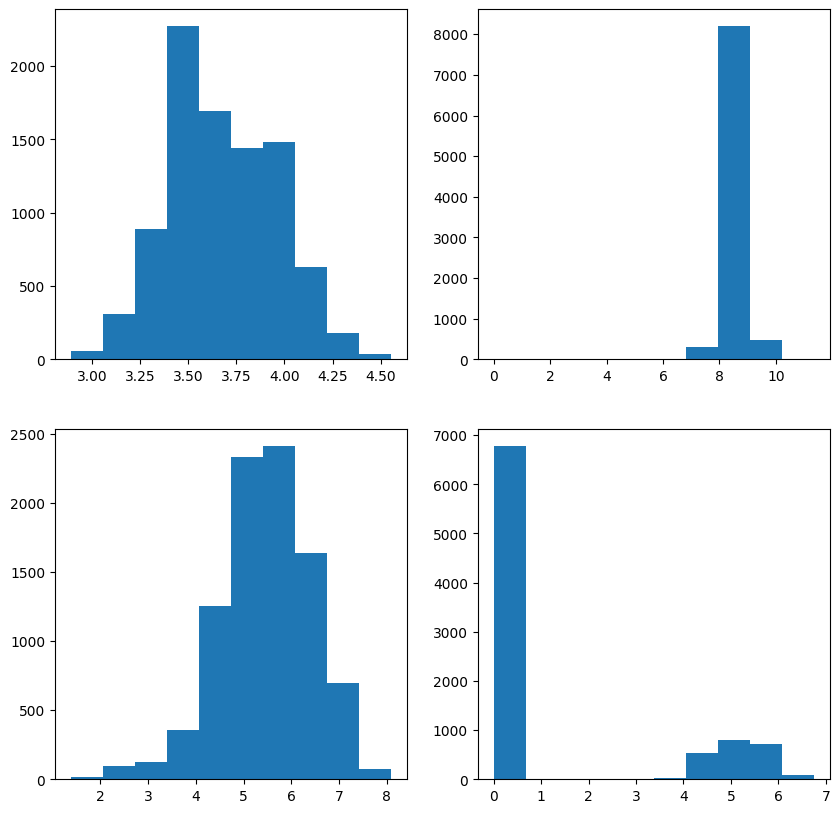

In [228]:
# Aplicar las transformaciones
# Para las variables "balance" y "pdays" se usaron potencias fraccionarias por facilidad
fig, axes = plt.subplots(2,2,figsize= (10,10))
axes[0,0].hist(t_log_age(data['age']))
axes[0,1].hist(t_log_balance(data['balance']))
axes[1,0].hist(t_log_dur(data['duration']))
axes[1,1].hist(t_log_dur(data['pdays']))

In [231]:
# Aplicando dichas transformaciones al dataframe
# Para los casos de "Balance" y "Pdays" no es recomendable aplicar las transformaciones
# Puesto que nos devuelven muchos valores nulos
data['age'] = t_log_age(data['age'])
data['duration'] = t_log_dur(data['duration'])

# Debido a que hay dos variables que no se transformaron, vamos a hacer un escalamiento
# para normalizar las unidades

def escalamiento (x):
  return (x - np.mean(x)) / np.std(x)

In [238]:
# Aplicar el escalamiento a las variables
data['age'] = escalamiento(data['age'])
data['balance'] = escalamiento(data['balance'])
data['duration'] = escalamiento(data['duration'])
data['pdays'] = escalamiento(data['pdays'])
data.head(7)

,age,balance,duration,campaign,pdays,previous,quarter,job_blue-collar,job_entrepreneur,job_housemaid,...,education_3,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,-0.883274,0.390563,0.311701,2,0.431706,6,4,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,-1.125301,0.033567,0.039359,1,-0.478348,0,3,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0.131355,0.220974,0.467137,1,-0.478348,0,4,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.851544,-0.461344,-2.644547,8,-0.478348,0,3,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.041744,-0.489059,0.776399,2,1.221038,11,3,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,1.390169,2.260009,1.194995,4,-0.478348,0,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,-0.340615,-0.423731,0.776399,1,-0.478348,0,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Partición de datos

In [254]:
# Dividir los datos en entradas y salidas
# Siendo Y la salida y X las entradas
# Entrenamiento, 60% ; validación, 20% ; prueba, 20%
Y = data['y_yes']
X = data.loc[:, data.columns != 'y_yes']

X = X.values
Y = Y.values

In [255]:
# Se especifica el tamaño del conjunto de entrenamiento
x_train,x_validation_and_test,y_train,y_validation_and_test = train_test_split(X, Y, train_size=0.6)

# Especificar el tamaño de los conjunto de prueba y validación
x_validation,x_test,y_validation,y_test = train_test_split(x_validation_and_test,y_validation_and_test, test_size=0.5)

# Regresión Logística

In [256]:
clf = LogisticRegression(C=1.0, solver= 'newton-cg')
modelo_RL = clf.fit(x_train, y_train)

# Obtener exactitud del modelo
print('Regresión Logística: \n Exactitud (accuracy) con el conjunto de validación = ',\
      modelo_RL.score(x_validation,y_validation))

Regresión Logística: 
 Exactitud (accuracy) con el conjunto de validación =  0.8188888888888889


In [257]:
pr = modelo_RL.predict(x_validation)
confusion_matrix(y_validation, pr)

array([[876, 152],
       [174, 598]])

In [261]:
# Usando GridScore para hallar los mejores parámetros
parameters = {'C':[0.1,0.15,0.18,0.2,0.22,0.24,0.28,0.3],
              'penalty':('l2','elasticnet','none'),
              'solver':('newton-cg','saga','sag','lbfgs')}

RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid,parameters)

modelo_RL_grid.fit(x_train, np.ravel(y_train))

print(modelo_RL_grid)

print('Los mejores valores encontrados son %s con un score de %0.2f'
      % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'sag', 'lbfgs')})
Los mejores valores encontrados son {'C': 0.28, 'penalty': 'l2', 'solver': 'saga'} con un score de 0.80
0.81


In [262]:
# Agregando los mejores parámetros al modelo
modelo_RL_2 = LogisticRegression(C=0.28, penalty= 'l2', solver= 'saga', max_iter=1000)

modelo_RL_2.fit(x_train, np.ravel(y_train))

print(modelo_RL_2.score(x_test,y_test))

0.81


In [263]:
# Matriz de confusión del modelo ajustado
pr2 = modelo_RL_2.predict(x_validation)
confusion_matrix(y_validation, pr2)

array([[873, 155],
       [175, 597]])

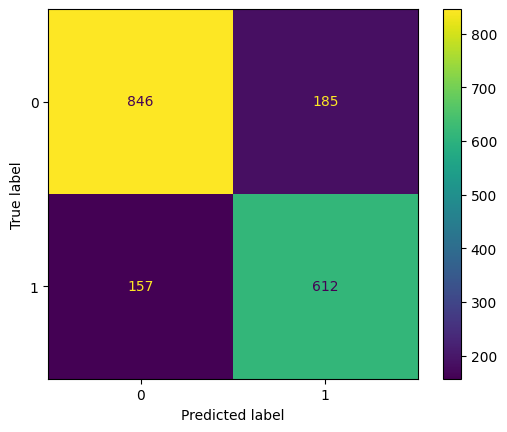

In [304]:
ConfusionMatrixDisplay.from_estimator(modelo_RL_2, x_test, y_test)

# Redes Neuronales

In [299]:
# Indicar el rango de número de neuronas que estaremos probando
neuronas = [i for i in range(1, 30, 2)]

# Iniciar las listas donde se guardará la exactitud de los conjuntos
train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

In [300]:
# Iteración de modelo
for i in neuronas:
  model_NN = MLPClassifier(hidden_layer_sizes= (i,i),
                           max_iter= 1000,
                           alpha= 1.0)
  model_NN.fit(x_train, y_train)

### Obtención de predicciones y cálculo de errores y exactitud con el
# conjunto de "Entrenamiento"
# Las predicciones del modelo se guardan en el arreglo train_yhat
# Se calcula el error y la exactitud del modelo para cada caso de "i" neuronas
# y se va agregando a la lista con la instrucción append
  train_yhat = model_NN.predict(x_train)

  train_loss = np.mean(abs(y_train - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


### Obtención de predicciones y cálculo de error y exactitud con el
# conjunto de "Prueba"
  test_yhat = model_NN.predict(x_test)

  test_loss = np.mean(abs(y_test - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)

### Mostrar resultados de cada iteración
  print('> %d...\t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f'
  % (i, train_acc, test_acc, train_loss, test_loss))

> 1...	 trainacc: 0.584, testacc: 0.573, trainloss: 0.416, testloss: 0.427
> 3...	 trainacc: 0.816, testacc: 0.814, trainloss: 0.184, testloss: 0.186
> 5...	 trainacc: 0.810, testacc: 0.811, trainloss: 0.190, testloss: 0.189
> 7...	 trainacc: 0.826, testacc: 0.823, trainloss: 0.174, testloss: 0.177
> 9...	 trainacc: 0.836, testacc: 0.821, trainloss: 0.164, testloss: 0.179
> 11...	 trainacc: 0.836, testacc: 0.821, trainloss: 0.164, testloss: 0.179
> 13...	 trainacc: 0.832, testacc: 0.819, trainloss: 0.168, testloss: 0.181
> 15...	 trainacc: 0.829, testacc: 0.819, trainloss: 0.171, testloss: 0.181
> 17...	 trainacc: 0.833, testacc: 0.826, trainloss: 0.167, testloss: 0.174
> 19...	 trainacc: 0.834, testacc: 0.824, trainloss: 0.166, testloss: 0.176
> 21...	 trainacc: 0.838, testacc: 0.817, trainloss: 0.162, testloss: 0.183
> 23...	 trainacc: 0.839, testacc: 0.814, trainloss: 0.161, testloss: 0.186
> 25...	 trainacc: 0.837, testacc: 0.823, trainloss: 0.163, testloss: 0.177
> 27...	 trainacc

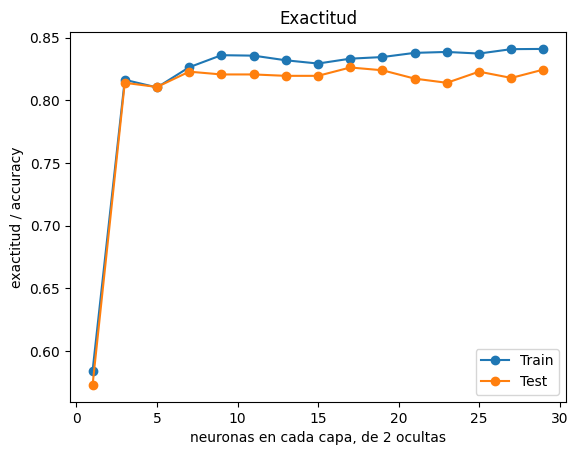

In [301]:
#Graficando Exactitud de entrenamiento
plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('exactitud / accuracy')
plt.show()

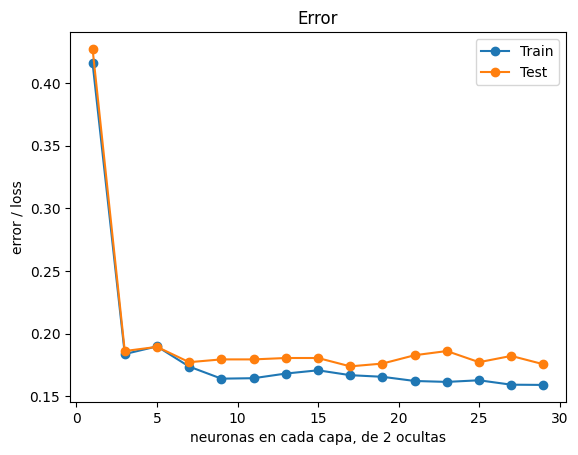

In [302]:
# Graficando Error en conjunto prueba
plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, test_errors, '-o', label='Test')
plt.legend()
plt.title('Error')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('error / loss')
plt.show()

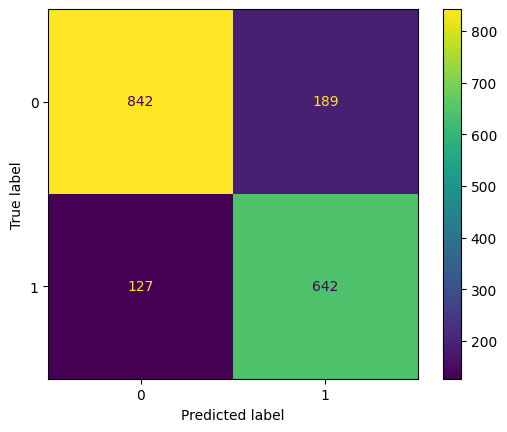

In [303]:
# Matriz de confusión del modelo
ConfusionMatrixDisplay.from_estimator(model_NN, x_test, y_test)